In [2]:
#import of Packages
#%matplotlib notebook
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes

sns.set_style("whitegrid")
from scipy import stats
from scipy.stats import anderson
from scipy.stats import norm
from scipy.stats import normaltest


import warnings
warnings.filterwarnings('ignore')

# Data Understanding

## Data Collection

In [3]:
# Import data
product_quantity = pd.read_csv(r"C:\Users\devfano1\OneDrive - EY\Documents\VF_Privat\PartA.csv", low_memory = False, encoding = 'utf-8')

product_ad = pd.read_csv(r"C:\Users\devfano1\OneDrive - EY\Documents\VF_Privat\PartB.csv", low_memory = False, encoding = 'utf-8')


In [4]:
#Structure of table product_quantity
print(product_quantity.dtypes)
print(product_quantity.shape)
product_quantity.head()

Product           object
Channel           object
WeekStart         object
QuantitySold       int64
Price            float64
isPromoPeriod       bool
dtype: object
(6565, 6)


,Product,Channel,WeekStart,QuantitySold,Price,isPromoPeriod
0,TXX5Q,E,2017-01-23,75,3.537000,True
1,TXQT7,E,2016-10-03,191,8.914645,True
2,TXX5Q,E,2015-10-05,111,3.483462,True
3,TXQ0T,C,2016-08-08,15312,4.784056,True
4,TXQQX,C,2017-11-13,12756,1.334446,True


In [5]:
#Structure of table product_ad
print(product_ad.dtypes)
print(product_ad.shape)
product_ad.head()

Product                object
Channel                object
WeekStart              object
TV                    float64
Online                float64
StoresAvailability      int64
dtype: object
(5965, 6)


,Product,Channel,WeekStart,TV,Online,StoresAvailability
0,TXX5Q,E,2015-01-05,0.0,0.0,45
1,TXQ0T,E,2015-01-05,0.0,0.0,32
2,TXX5Q,B,2015-01-05,0.0,0.0,26
3,TXQ0T,B,2015-01-05,0.0,0.0,30
4,TXX5Q,A,2015-01-05,0.0,0.0,48


In [6]:
product_ad.dtypes

Product                object
Channel                object
WeekStart              object
TV                    float64
Online                float64
StoresAvailability      int64
dtype: object

#### Change StoresAvailability in float

In [7]:
product_ad['StoresAvailability'] = product_ad['StoresAvailability']/100

#### Duplicates and missing values in both tables

In [8]:
print("product_quantity duplicates (row): "+str(product_quantity.duplicated().sum()))
print("product_ad duplicates (row): "+str(product_ad.duplicated().sum()))

product_quantity duplicates (row): 600
product_ad duplicates (row): 0


In [9]:
duplicates_Product = product_quantity[product_quantity.duplicated()]
print("Duplicate are made for these variables:")
for i in {'Product', 'Channel', 'WeekStart'}:
    print (duplicates_Product[i].name+":")
    print (duplicates_Product[i].sort_values().unique())
    print ("\n")

Duplicate are made for these variables:
Product:
['TXQ0T' 'TXQQX' 'TXQT7' 'TXQTZ' 'TXX00' 'TXX06' 'TXX5Q' 'TXXX0' 'TXZ06']


Channel:
['A' 'B' 'C' 'D' 'E' 'F']


WeekStart:
['2015-01-26' '2015-02-02' '2015-02-09' '2015-02-16' '2015-02-23'
 '2015-03-02' '2015-03-09' '2015-03-16' '2015-03-23' '2015-03-30'
 '2015-04-06' '2015-04-13' '2015-04-20' '2015-04-27' '2015-05-04'
 '2015-05-11' '2015-05-18' '2015-05-25']




Duplicates have been made in the first half of 2015

In [10]:
#Drop duplicates
product_quantity.drop_duplicates(inplace=True)

In [11]:
#Missing values in both tables:
print("product_quantity Table Null values")
print(product_quantity.isnull().sum())
print ("\n")
print("product_ad Table Null values")
print(product_ad.isnull().sum())
print ("\n")
print("product_quantity Table NA values")
print(product_quantity.isna().sum())
print ("\n")
print("product_ad Table NA values")
print(product_ad.isna().sum())

product_quantity Table Null values
Product          0
Channel          0
WeekStart        0
QuantitySold     0
Price            0
isPromoPeriod    0
dtype: int64


product_ad Table Null values
Product               0
Channel               0
WeekStart             0
TV                    0
Online                0
StoresAvailability    0
dtype: int64


product_quantity Table NA values
Product          0
Channel          0
WeekStart        0
QuantitySold     0
Price            0
isPromoPeriod    0
dtype: int64


product_ad Table NA values
Product               0
Channel               0
WeekStart             0
TV                    0
Online                0
StoresAvailability    0
dtype: int64


#### Merge both tables

In [12]:
products = pd.merge(product_quantity, product_ad,how = 'inner', on=["Product", "Channel", "WeekStart"])

In [13]:
products.head()

,Product,Channel,WeekStart,QuantitySold,Price,isPromoPeriod,TV,Online,StoresAvailability
0,TXX5Q,E,2017-01-23,75,3.537000,True,0.00,0.000,0.47
1,TXQT7,E,2016-10-03,191,8.914645,True,170590.61,9574.474,0.48
2,TXX5Q,E,2015-10-05,111,3.483462,True,0.00,0.000,0.53
3,TXQ0T,C,2016-08-08,15312,4.784056,True,0.00,0.000,0.90
4,TXQQX,C,2017-11-13,12756,1.334446,True,208647.18,42411.096,0.37


## Data Description

#### Shape and data types of new dataset

In [14]:
print("Products dataset rows: {}".format(products.shape[0]))
print("Products dataset columns: {}".format(products.shape[1]))
print("Products duplicates (row): "+str(products.duplicated().sum()))

Products dataset rows: 5965
Products dataset columns: 9
Products duplicates (row): 0


In [15]:
products.dtypes

Product                object
Channel                object
WeekStart              object
QuantitySold            int64
Price                 float64
isPromoPeriod            bool
TV                    float64
Online                float64
StoresAvailability    float64
dtype: object

#### Unique values

In [16]:
for i in products:
    print (products[i].name+":")
    print (products[i].sort_values().unique())
    print ("\n")

Product:
['TXQ0T' 'TXQQX' 'TXQT7' 'TXQTZ' 'TXX00' 'TXX06' 'TXX5Q' 'TXXX0' 'TXZ06'
 'TZQAQ']


Channel:
['A' 'B' 'C' 'D' 'E' 'F']


WeekStart:
['2015-01-05' '2015-01-12' '2015-01-19' '2015-01-26' '2015-02-02'
 '2015-02-09' '2015-02-16' '2015-02-23' '2015-03-02' '2015-03-09'
 '2015-03-16' '2015-03-23' '2015-03-30' '2015-04-06' '2015-04-13'
 '2015-04-20' '2015-04-27' '2015-05-04' '2015-05-11' '2015-05-18'
 '2015-05-25' '2015-06-01' '2015-06-08' '2015-06-15' '2015-06-22'
 '2015-06-29' '2015-07-06' '2015-07-13' '2015-07-20' '2015-07-27'
 '2015-08-03' '2015-08-10' '2015-08-17' '2015-08-24' '2015-08-31'
 '2015-09-07' '2015-09-14' '2015-09-21' '2015-09-28' '2015-10-05'
 '2015-10-12' '2015-10-19' '2015-10-26' '2015-11-02' '2015-11-09'
 '2015-11-16' '2015-11-23' '2015-11-30' '2015-12-07' '2015-12-14'
 '2015-12-21' '2015-12-28' '2016-01-04' '2016-01-11' '2016-01-18'
 '2016-01-25' '2016-02-01' '2016-02-08' '2016-02-15' '2016-02-22'
 '2016-02-29' '2016-03-07' '2016-03-14' '2016-03-21' '2016-03-28'


#### Detection of missing values and errors in new table

In [17]:
print( products.isnull().sum())

Product               0
Channel               0
WeekStart             0
QuantitySold          0
Price                 0
isPromoPeriod         0
TV                    0
Online                0
StoresAvailability    0
dtype: int64


-> No missing values in merged product table

#### Export to CSV

In [19]:
products.to_csv(r"C:\Users\devfano1\Documents\Privat\export_products_clean.csv", index=False, encoding='utf-8')

## Data Exploration
### Analysis of historical data 
#### Analysis of average quantity sold per product

In [20]:
#Add Month & year column
products['Month'] = pd.DatetimeIndex(products['WeekStart']).month
products['Year'] = pd.DatetimeIndex(products['WeekStart']).year

#Drop WeekStart
products.drop(['WeekStart'], axis =1, inplace = True)

In [21]:
products.columns

Index(['Product', 'Channel', 'QuantitySold', 'Price', 'isPromoPeriod', 'TV',
       'Online', 'StoresAvailability', 'Month', 'Year'],
      dtype='object')

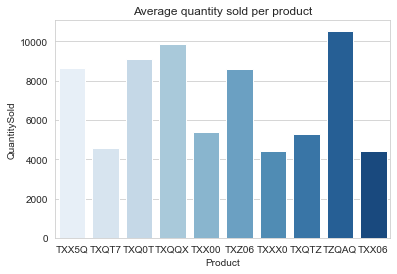

In [22]:
ax = sns.barplot(x="Product", y="QuantitySold", data = products, ci=None, estimator = np.average, palette = 'Blues')
ax.set_title("Average quantity sold per product")
plt.show()

Most sold product is TXQAQ.

#### Price over the years

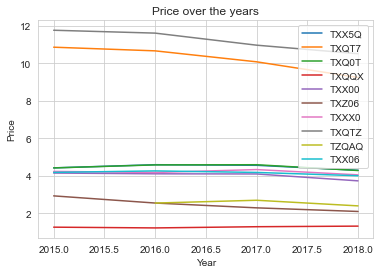

In [23]:
plt.figure()
ax = sns.lineplot(x="Year", y="Price", hue = 'Product', data = products, estimator = np.average, ci=None)
ax.legend(loc = 'upper right')
ax.set_title("Price over the years")
plt.show()

Price is decreasing for TXQT7 and TXQTZ (maybe related products as they have similiar names), but still both are the most expensive products still.

The price of TXQT7 was decreased a lot during 2016-2017. On the other hand you can see that the quantity decreased in 2016, but then increased again in 2017 and 2018. --> Due to decreasing quantity sold maybe the price was adjusted. --> Quantity sold increased again.  

The lowest price has product TXQQX. This is also one of the most sold products. The quantity sold was increasing constantly. Therefore it was possible to increase the price slowly and increase so the revenue. 

#### Revenue

In [24]:
products['Revenue'] = (products['QuantitySold']*products['Price']) 

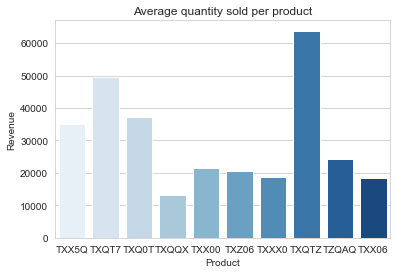

In [25]:
ax = sns.barplot(x="Product", y="Revenue", data = products, ci=None, estimator = np.average, palette = 'Blues')
ax.set_title("Average quantity sold per product")
plt.show()

The highest revenue (price * quantity sold) is bringing in average Product TXQTZ.

#### Influence of TV or Online advertisment

In [26]:
products['TVimpact'] = False
for i in range(len(products['TV'])):
    if products['TV'][i] > 0:
        products['TVimpact'][i] = True
        
products['OnlineImpact'] = False
for i in range(len(products['Online'])):
    if products['Online'][i] > 0:
        products['OnlineImpact'][i] = True


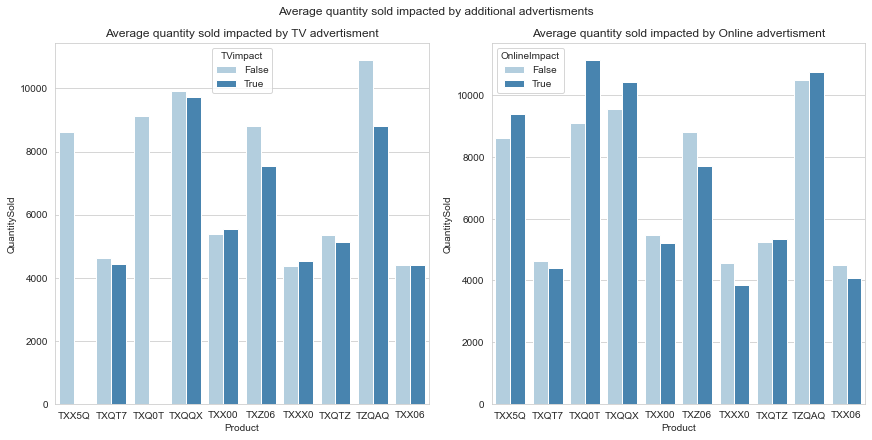

In [27]:
fig, axes = plt.subplots(1,2, figsize = (12,6),  constrained_layout = True)
fig.suptitle("Average quantity sold impacted by additional advertisments")

sns.barplot(x="Product", y="QuantitySold",hue='TVimpact', data = products, estimator = np.average,
                 ci=None, palette = 'Blues', ax = axes[0])
ax = axes[0].set_title("Average quantity sold impacted by TV advertisment")

sns.barplot(x="Product", y="QuantitySold",hue='OnlineImpact', data = products, estimator = np.average,
                 ci=None, palette = 'Blues', ax = axes[1])
ax = axes[1].set_title("Average quantity sold impacted by Online advertisment")

plt.show()


Quantity sold is higher if online advertisment is spent. 

#### Revenue per Product including cost of advertisment

In [28]:
products['Revenue2'] = (products['QuantitySold']*products['Price']) - (products['TV']+products['Online'])

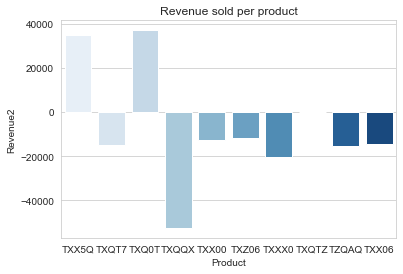

In [29]:
ax = sns.barplot(x="Product", y="Revenue2", data = products, ci=None, estimator = np.average, palette = 'Blues')
ax.set_title("Revenue sold per product")
plt.show()

For Product TXQQX the extra advertisment was more expensive in average then the revenue. 

In [30]:
#Drop 
products.drop(['TVimpact', 'OnlineImpact', 'Revenue', 'Revenue2'], axis =1, inplace = True)

#### Analysis of seasonality

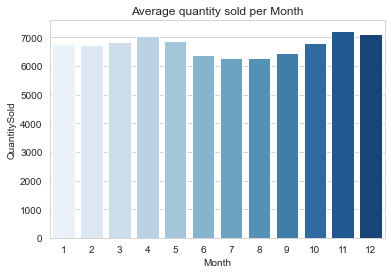

In [31]:
#Month 
ax = sns.barplot(x="Month", y="QuantitySold", data = products, ci=None, estimator = np.average, palette = 'Blues')
ax.set_title("Average quantity sold per Month")
plt.show()

- November is most sold. 
- During summer period is a bit less.

#### Quantity sold per month per product

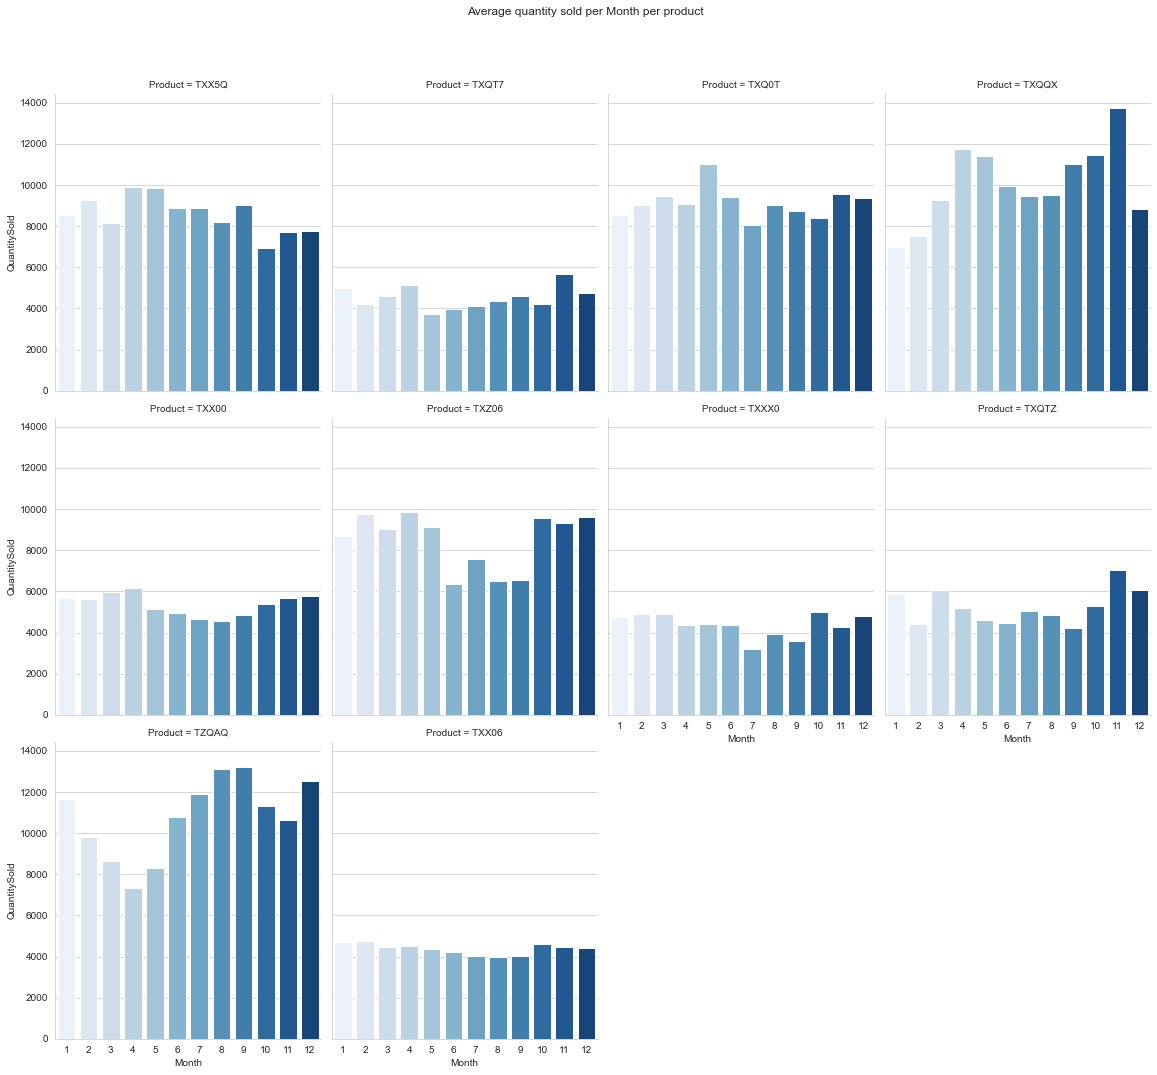

In [32]:
mqs= sns.catplot(x="Month", y="QuantitySold", col = 'Product', data = products, kind="bar",ci=None, estimator = np.average,
            palette = 'Blues', height = 5, aspect=.8, col_wrap = 4, margin_titles=True)

mqs.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
mqs.fig.suptitle("Average quantity sold per Month per product")
plt.show()

Top Products: TXQQX (especially in November) and TZQAQ (esp. in August, Sept)

#### Quantity sold per year

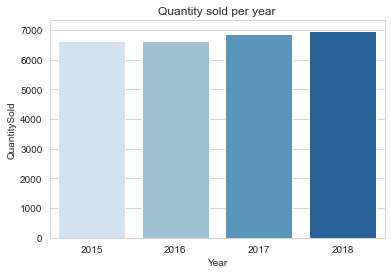

In [33]:
#year
plt.figure()
ax = sns.barplot(x="Year", y="QuantitySold", data = products, ci=None, palette = 'Blues')
ax.set_title("Quantity sold per year")
plt.show()

Constantly increasing of sold products --> 2018 has most quantities, even if the data is provided only for the first 4 month. 

#### Quantity sold per product on years


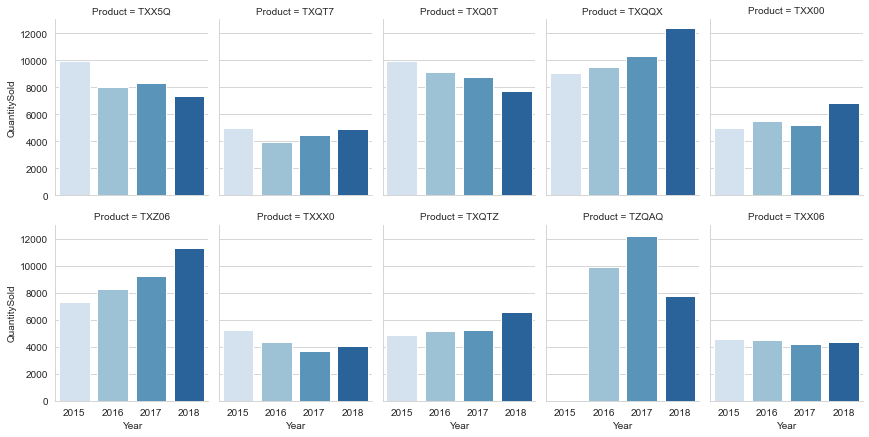

In [39]:
sns.catplot(x="Year", y="QuantitySold", col = 'Product', data = products, kind="bar", ci=None, palette = 'Blues', 
            estimator = np.average, height = 3, aspect=.8, col_wrap=5,)
mqs.fig.subplots_adjust(top=0.9) 
mqs.fig.suptitle("Average quantity sold per year per product")
plt.show()

Product TXX06 and TXQQX are most sold in 2018. 

Product TXQAQ was released in 2016 and most sold product 2017.

#### Quantity sold per distribution channel

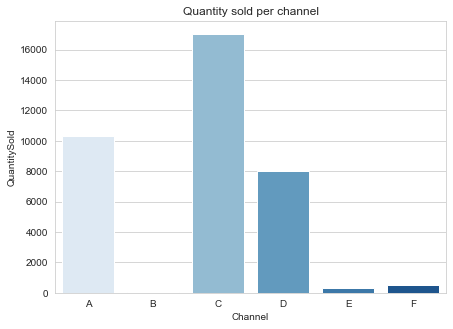

In [40]:
plt.figure(figsize = (7,5))
ax = sns.barplot(x="Channel", y="QuantitySold", data = products, ci=None, estimator = np.average,
                 palette = 'Blues', order = products['Channel'].sort_values().unique())
ax.set_title("Quantity sold per channel")
plt.show()

In [41]:
channel_Product= pd.pivot_table(products, values= 'QuantitySold',
                                index =  ['Channel'], columns = ['Product'], aggfunc =np.average,
                                margins = True, margins_name = "Total")
channel_Product.style.background_gradient(cmap='Blues')

Product,TXQ0T,TXQQX,TXQT7,TXQTZ,TXX00,TXX06,TXX5Q,TXXX0,TXZ06,TZQAQ,Total
Channel,,,,,,,,,,,
A,19890.922156,nan,6163.560000,6747.333333,2569.977778,1569.231884,19720.103659,nan,1553.086957,3778.647059,10285.176250
B,32.494186,nan,63.500000,80.614035,36.514620,37.750000,32.595376,49.826590,88.947368,19.250000,50.272789
C,16754.212644,12792.208092,13209.053892,15453.764706,17191.362069,13977.850575,15182.632184,14095.879195,23127.775862,34026.693694,17029.292683
D,nan,52.714286,4157.666667,4970.000000,6985.114286,5790.696296,nan,5409.722222,11757.788079,6393.384615,8022.278539
E,127.589595,nan,196.206897,201.183908,315.213873,337.396552,118.450867,492.235632,702.586207,235.342342,305.981333
F,nan,55.800000,706.583333,841.944444,1514.250000,nan,nan,1177.000000,nan,221.600000,481.122642
Total,9132.185131,9848.586667,4549.194676,5270.064516,5410.667102,4408.126103,8628.663743,4408.708812,8618.816739,10548.906667,6748.426488


Multiple products are only sold on specific channels. 

#### Does the promo period influence the quantity sold?

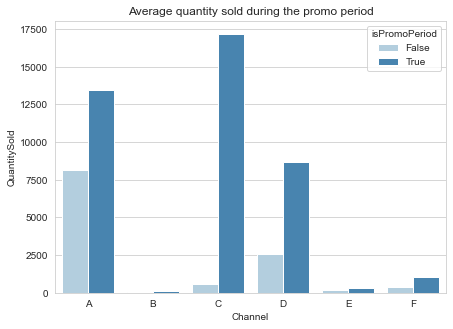

In [42]:
plt.figure(figsize = (7,5))
ax = sns.barplot(x="Channel", y="QuantitySold",hue='isPromoPeriod', data = products, estimator = np.average,
                 ci=None, palette = 'Blues', order = products['Channel'].sort_values().unique())
ax.set_title("Average quantity sold during the promo period")
plt.show()

In [43]:
channel_PromoPeriod= pd.pivot_table(products, values = 'QuantitySold', columns = ['isPromoPeriod'],
                                index =  ['Channel'], aggfunc =np.average, margins = True, margins_name = "Total")

channel_PromoPeriod['Percentage'] = np.round(((channel_PromoPeriod[True]-channel_PromoPeriod[False])/channel_PromoPeriod[False])*100,2)

channel_Product.style.background_gradient(cmap='Blues')
channel_PromoPeriod

isPromoPeriod,False,True,Total,Percentage
Channel,,,,
A,8124.547368,13443.018462,10285.176250,65.46
B,43.721595,107.552632,50.272789,145.99
C,583.800000,17181.097231,17029.292683,2842.98
D,2590.808511,8675.166240,8022.278539,234.84
E,183.581152,347.803220,305.981333,89.45
F,376.811111,1067.875000,481.122642,183.40
Total,1775.804962,9953.827406,6748.426488,460.52


The promo periode increases the quantity sold, especially on channel C. However, Channel A is not that much fluenced percentage wise by promo period.

#### Store Availability

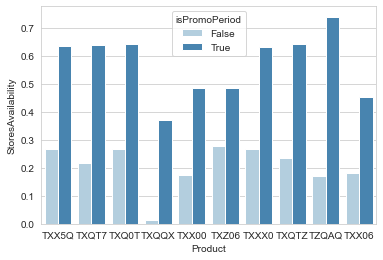

In [44]:
plt.figure()
ax = sns.barplot(x="Product", y="StoresAvailability", data = products, hue ='isPromoPeriod', ci=None, palette = 'Blues')
plt.show()

Stores Availability increases during promo period. 

#### Correlation matrix

In [45]:
products_corr = products.drop(['Year'], axis =1, inplace = True)

In [46]:
products_corr = pd.get_dummies(products, columns=['Channel', 'Product'])

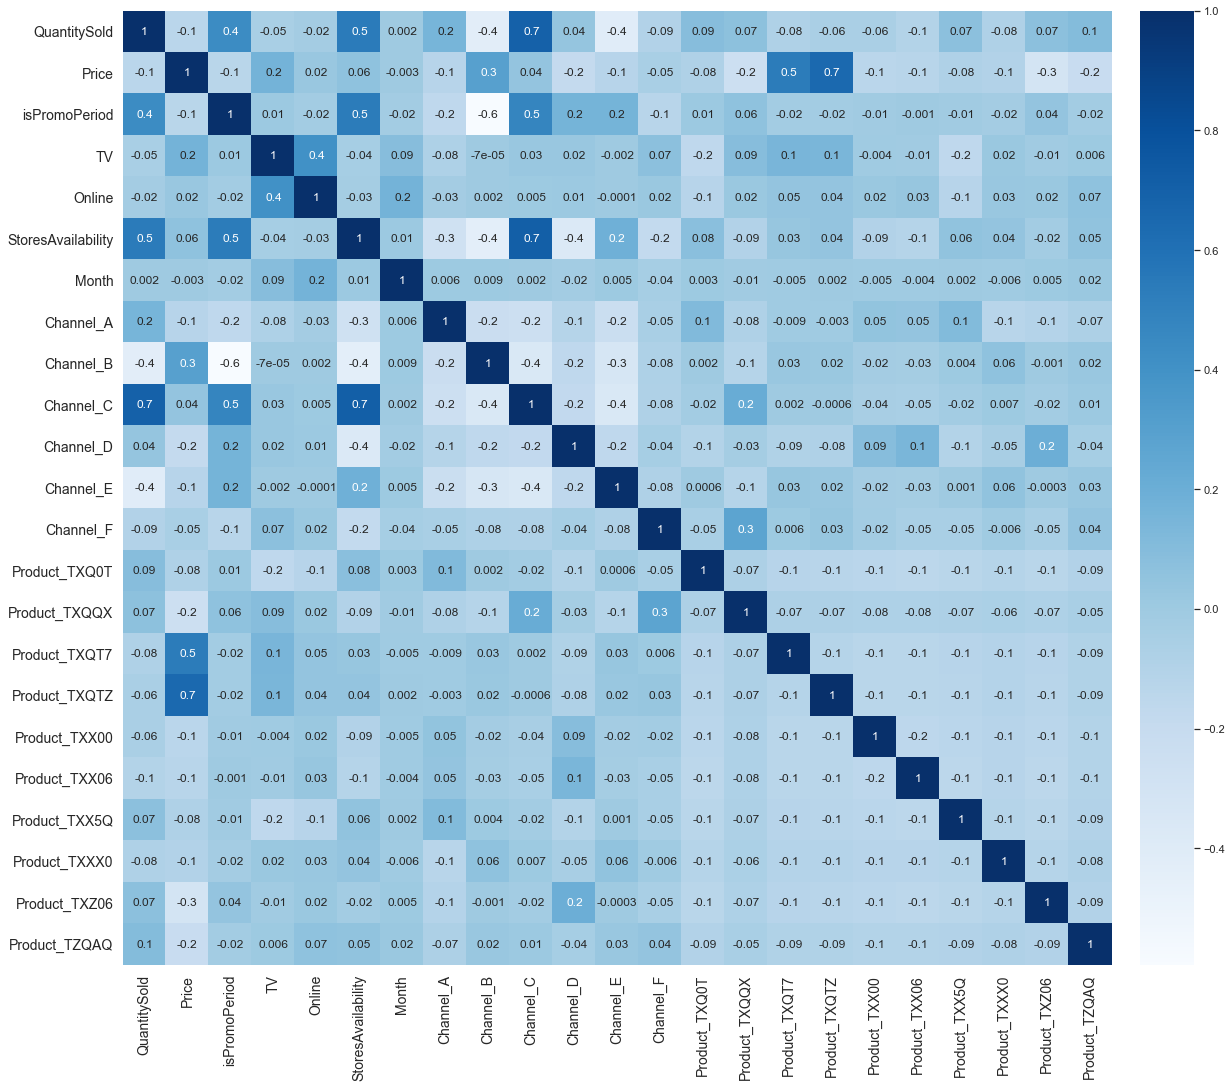

In [47]:
#Correlation between Products and Channels:
plt.figure(figsize = (17,15), constrained_layout = True)
sns.set(font_scale=1)
corr=products_corr.corr()

hmap = sns.heatmap(data = corr, annot=True, linecolor="white",  cmap= 'Blues', fmt='.1g')
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 14)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 14)
plt.show()

- no Correlation between the products
- no Correlation between products and channels
- Correlation between: 
    - Quantity Sold and Stores Availability, Channel C, Promo Period
    - Price and Product TXQT7 and Product TXQTZ
    - Promo Period and Channel C, Stores Availability
    - Channel C and Stores Availability

--> It is likely that Channel C is (physical) stores.

### Normality check of the data

In [48]:
from statsmodels.graphics.gofplots import qqplot

#### Visual normality check

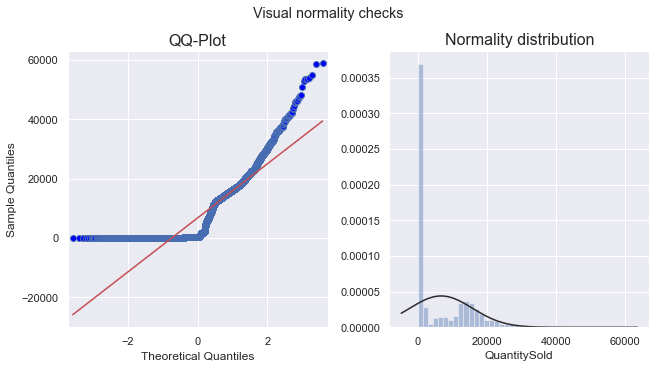

In [49]:
#QQ-Plot and Normaldistribution plot

fig, axes = plt.subplots(1,2, figsize = (9,5),  constrained_layout = True)
fig.suptitle("Visual normality checks")

#stats.probplot(products['QuantitySold'], dist="norm", plot=axes[0])
qqplot(products['QuantitySold'], line = 's', ax = axes[0])
ax=axes[0].set_title("QQ-Plot", fontsize = 16)
sns.distplot(products['QuantitySold'], fit=stats.norm, kde=False, ax= axes[1])
ax =axes[1].set_title("Normality distribution", fontsize = 16)
#plt.xlim(-1000, 5000)

#### Normality tests

In [50]:
#Shapiro-Wilk-Test -> not so reliable since data set might be too big.
stat, p = stats.shapiro(products['QuantitySold'])
print("Statistics: " + str(stat))
print("p-value: " + str(p))

Statistics: 0.7585604786872864
p-value: 0.0


In [51]:
#D'Agostino's-K^2-Test
stat, p = normaltest(products['QuantitySold'])
print('Statistics= %.3f, p= %.3f' % (stat, p))

Statistics= 1425.121, p= 0.000


In [54]:
#Anderson-Darling-Test
result = anderson(products['QuantitySold'])
print('Statistics: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistics: 562.101
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


--> The data is not normal distributed.

# Data Preparation

In [55]:
#import of Packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

#Regression-Algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

import pickle

#### Get dummy variables

In [56]:
products = pd.get_dummies(products, columns=['Product', 'Channel', 'Month'], drop_first = True)

#### Export to CSV

In [57]:
products.to_csv(r"C:\Users\devfano1\Documents\Privat\export_products_notNorm.csv", index=False, encoding='utf-8')

#### Normalization

In [58]:
scaler = MinMaxScaler()
products[['Price','TV','Online', 'StoresAvailability']] = scaler.fit_transform(products[['Price', 'TV',
       'Online', 'StoresAvailability']])

products.head()

products.dtypes

QuantitySold            int64
Price                 float64
isPromoPeriod            bool
TV                    float64
Online                float64
StoresAvailability    float64
Product_TXQQX           uint8
Product_TXQT7           uint8
Product_TXQTZ           uint8
Product_TXX00           uint8
Product_TXX06           uint8
Product_TXX5Q           uint8
Product_TXXX0           uint8
Product_TXZ06           uint8
Product_TZQAQ           uint8
Channel_B               uint8
Channel_C               uint8
Channel_D               uint8
Channel_E               uint8
Channel_F               uint8
Month_2                 uint8
Month_3                 uint8
Month_4                 uint8
Month_5                 uint8
Month_6                 uint8
Month_7                 uint8
Month_8                 uint8
Month_9                 uint8
Month_10                uint8
Month_11                uint8
Month_12                uint8
dtype: object

In [59]:
#### Export to CSV

products.to_csv(r"C:\Users\devfano1\Documents\Privat\export_products_Norm.csv", index=False, encoding='utf-8')

# Modeling

### Regression model

#### Split into train and test data

In [60]:
Y = products['QuantitySold'].values
X = products.drop(['QuantitySold'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.25)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4473, 30)
(1492, 30)
(4473,)
(1492,)


#### Used regression methods

In [61]:
#Used Models
models = []
models.append(('LR', LinearRegression()))
models.append(('RandomForest', RandomForestRegressor(n_estimators = 100)))
models.append(('RidgeRegression', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('dtr', DecisionTreeRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor(n_estimators=100, random_state=0)))
models.append(('SVR', SVR()))

#### Apply models

In [62]:
names = []
scores = []
train_errors = []
test_errors = []
train_errors_absolute = []
test_errors_absolute = []
variance_scores =[]
results = []
RMS = 'neg_mean_squared_error'
for name, model in models:
    model.fit(X_train,Y_train)
    score = model.score(X_train,Y_train)
    train_error = mean_squared_error(Y_train, model.predict(X_train))
    y_pred = model.predict(X_test)
    test_error = mean_squared_error(Y_test, y_pred)
    train_error_absolute = mean_absolute_error(Y_train, model.predict(X_train))
    test_error_absolute = mean_absolute_error(Y_test, y_pred)
    variance_score=explained_variance_score(Y_test,y_pred)
    kfold = KFold()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    
    names.append(name)
    results.append(cv_results)
    scores.append(score)
    train_errors.append(train_error)
    test_errors.append(test_error)
    train_errors_absolute.append(train_error_absolute)
    test_errors_absolute.append(test_error_absolute)         
    variance_scores.append(variance_score)


# Evaluation

In [63]:
results_table = pd.concat([pd.DataFrame([[names[i], scores[i], variance_scores[i], train_errors[i], test_errors[i], 
                                         train_errors_absolute[i], test_errors_absolute[i]]], 
                              columns = ["Models","Score", "Variance Score", "Train set mse", 
                                         "Test set mse", "Train set mae", "Test set mae"]) for i in range(len(models))],ignore_index = True)

results_table = results_table.sort_values(by=('Score'),ascending=False)

results_table.style.background_gradient(cmap='Blues')

,Models,Score,Variance Score,Train set mse,Test set mse,Train set mae,Test set mae
5,dtr,1.000000,0.887688,0.018891,9870233.268767,0.002906,1239.240617
6,ExtraTrees,1.000000,0.915137,0.019372,7470036.355794,0.003541,1058.408934
1,RandomForest,0.989804,0.930751,824138.666242,6085605.482091,333.845627,992.385266
4,KNN,0.921904,0.863529,6312213.774058,11999531.507292,1060.561323,1609.515550
0,LR,0.757691,0.758183,19584978.719206,21324702.311955,3053.049059,3149.041159
3,LASSO,0.757656,0.758120,19587812.366711,21330963.667083,3049.258906,3145.391571
2,RidgeRegression,0.757630,0.757927,19589901.406485,21347576.100946,3045.404351,3143.111097
7,SVR,-0.440630,0.030057,116440825.270063,131092268.475845,6343.400336,6926.504272


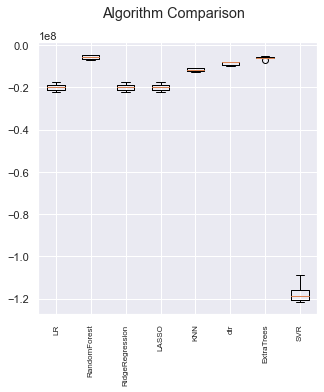

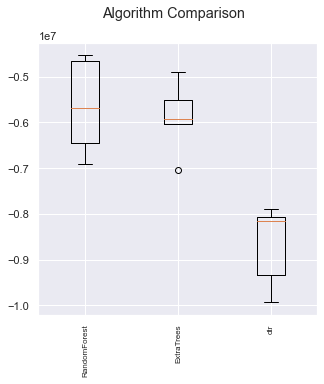

In [64]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation ='vertical', fontsize = 8)
plt.show()

results2 = [results[1], results[6], results[5]]
names2  = [names[1], names[6], names[5]]

fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2, rotation ='vertical', fontsize = 8)
plt.show()

-> Decision Tree is most accurate, Random Forest best cross validation results. Extra Trees has also appr accuracy score 1 and a good cv result.

#### Analyze 3 best regression algorithms: Decision Tree, Extra Trees, Random Forest

In [65]:
#Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_train_pred_dtr = dtr.predict(X_train)
res_dtr = (Y_train - y_train_pred_dtr)

#Extra Tree
et = ExtraTreesRegressor(n_estimators=100, random_state=0)
et.fit(X_train,Y_train)
y_train_pred_et = et.predict(X_train)
res_et = (Y_train - y_train_pred_et)

#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train,Y_train)
y_train_pred_rf = rf.predict(X_train)
res_rf = (Y_train - y_train_pred_rf)


#### Distribution of error terms

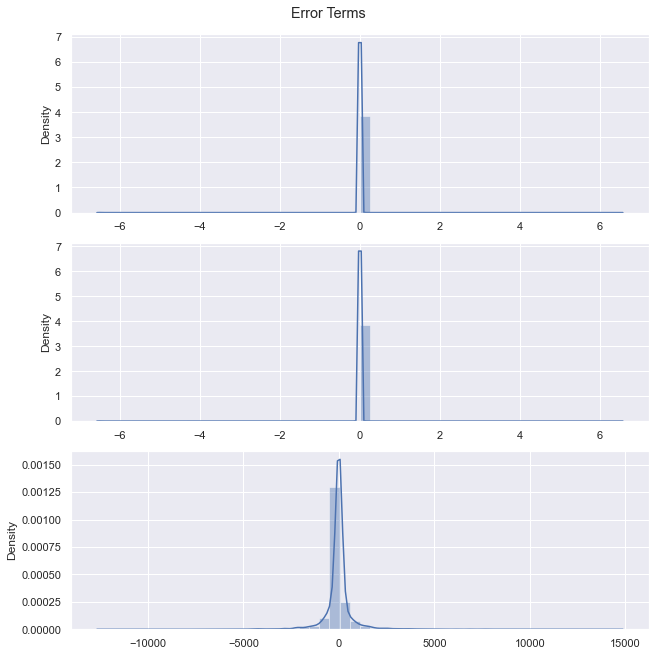

In [66]:
fig, axes = plt.subplots(3,1, figsize=(9,9), constrained_layout = True)
fig.suptitle("Error Terms")

sns.distplot(res_dtr, ax = axes[0])
sns.distplot(res_et, ax = axes[1])
sns.distplot(res_rf, ax = axes[2])

plt.show()


#### Key influencer

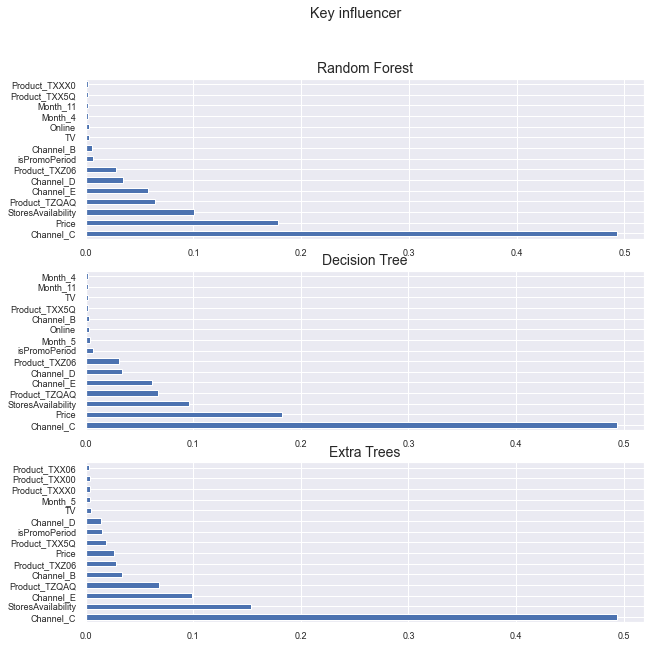

In [67]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.suptitle("Key influencer")

feat_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_rf.nlargest(15).plot(kind='barh', ax = axes[0],fontsize = 9)
ax=axes[0].set_title("Random Forest", fontsize = 14)

feat_importances_dtr = pd.Series(dtr.feature_importances_, index=X.columns)
feat_importances_dtr.nlargest(15).plot(kind='barh', ax = axes[1], fontsize = 9)
ax=axes[1].set_title("Decision Tree", fontsize = 14)

feat_importances_et = pd.Series(et.feature_importances_, index=X.columns)
feat_importances_et.nlargest(15).plot(kind='barh', ax = axes[2], fontsize = 9)
ax=axes[2].set_title("Extra Trees", fontsize = 14)

plt.show()

Key Influencer is Channel C, Store Availability and Price for the quantity sold. 

#### Export files as .pkl

In [68]:
pickle.dump(rf,open('rf_model.pkl','wb'))
pickle.dump(dtr,open('dtr_model.pkl','wb'))
pickle.dump(et,open('et_model.pkl','wb'))

In [69]:
products.columns

Index(['QuantitySold', 'Price', 'isPromoPeriod', 'TV', 'Online',
       'StoresAvailability', 'Product_TXQQX', 'Product_TXQT7', 'Product_TXQTZ',
       'Product_TXX00', 'Product_TXX06', 'Product_TXX5Q', 'Product_TXXX0',
       'Product_TXZ06', 'Product_TZQAQ', 'Channel_B', 'Channel_C', 'Channel_D',
       'Channel_E', 'Channel_F', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [70]:
#Example prediction
input = np.matrix([[5,False, 0, 0, 0.10, 1, 0, 0, 0, 0, 0, 0, 0,0,0,1,0,0,0, 0,0,0,0,0,0,0,0,0,0,1]])
dtr.predict(input)

array([1305.])

#### Tuning Parameters

In [71]:
# Run Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
#Decision Tree Parameters
parameters_dtr = {'ccp_alpha': np.linspace(0, 5.0, endpoint=True),
              'criterion': ['mse', 'friedman_mse', 'mae', 'poission'], 
              'splitter': ['best', 'random'], 
              'min_samples_split':np.linspace(0.1, 2, 10, endpoint=True),
              'max_depth': [None,30,50,100,110,150],
               'max_features': ['auto', 'sqrt', 'log2'], 
               'max_leaf_nodes': [None,30,50,100,110,150,300],
              'min_impurity_decrease':[0, 0.5, 1],
              'min_impurity_split':[None,1,5],
              'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
            'min_weight_fraction_leaf': [0, 0.25, 0.5],
              'random_state':[None, 16, 32]
             }

In [73]:
# Optimize Parameters for Decision Tree
random_dtr = RandomizedSearchCV(DecisionTreeRegressor(), parameters_dtr,  refit = True)

#fitting the model for grid search
random_dtr.fit(X_train,Y_train)

#print best parameter after tuning
random_dtr_best_param = random_dtr.best_params_
print(random_dtr_best_param)
random_dtr_predictions = random_dtr.predict(X_test)

{'splitter': 'random', 'random_state': 32, 'min_weight_fraction_leaf': 0.25, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'min_impurity_split': 5, 'min_impurity_decrease': 0, 'max_leaf_nodes': 110, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'friedman_mse', 'ccp_alpha': 3.7755102040816326}


In [74]:
#parameters for Extra Trees and Random Forest
parameters_et_rf = {'bootstrap':[True, False],
                    'ccp_alpha': np.linspace(0.1, 5.0, endpoint=True),
                    'criterion': ['mse', 'mae'],
                    'max_depth': [None,30,50,100,110,150], 
                    'max_features': ['auto', 'sqrt', 'log2'], 
                    'max_leaf_nodes': [None,50,100,150,300],
                    'min_impurity_decrease':[0, 0.5, 1],
                    'min_impurity_split':[None,1,5],
                    'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
                    'min_weight_fraction_leaf': [0, 0.25, 0.5],
                    'n_estimators':[100, 200, 300],
                    'oob_score': [True, False],
                    'random_state':[None, 16, 32]
             }

In [75]:
# Optimize Parameters for Random Forest
random_rf = RandomizedSearchCV(RandomForestRegressor(), parameters_et_rf,cv=3)

#fitting the model for random search
random_rf.fit(X_train,Y_train)

#print best parameter after tuning
random_rf_best_param = random_rf.best_params_
print(random_rf_best_param)
random_rf_predictions = random_rf.predict(X_test)

{'random_state': None, 'oob_score': False, 'n_estimators': 100, 'min_weight_fraction_leaf': 0, 'min_samples_leaf': 0.30000000000000004, 'min_impurity_split': 5, 'min_impurity_decrease': 1, 'max_leaf_nodes': 50, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'mae', 'ccp_alpha': 0.4, 'bootstrap': False}


In [76]:
# Optimize Parameters for Extra Trees
random_et = RandomizedSearchCV(ExtraTreesRegressor(), parameters_et_rf, cv = 3, refit = True)

#fitting the model for grid search
random_et.fit(X_train,Y_train)

#print best parameter after tuning
random_et_best_param = random_et.best_params_
print(random_et_best_param)
random_et_predictions = random_et.predict(X_test)

{'random_state': 32, 'oob_score': False, 'n_estimators': 300, 'min_weight_fraction_leaf': 0, 'min_samples_leaf': 0.1, 'min_impurity_split': 5, 'min_impurity_decrease': 0, 'max_leaf_nodes': 300, 'max_features': 'auto', 'max_depth': 150, 'criterion': 'mae', 'ccp_alpha': 2.7, 'bootstrap': True}


In [77]:
# grid_dtr = GridSearchCV(DecisionTreeRegressor(), parameters_dtr,  refit = True, verbose = 3, n_jobs = -1)

# #fitting the model for grid search
# grid_dtr.fit(X_train,Y_train)

# #print best parameter after tuning
# print(grid_dtr.best_params_)
# grid_dtr_predictions = grid_dtr.predict(X_test)

# grid_rf = GridSearchCV(RandomForestRegressor(), parameters_et_rf,cv=3, refit = True)

# #fitting the model for grid search
# grid_rf.fit(X_train,Y_train)

# #print best parameter after tuning
# print(grid_rf.best_params_)
# grid_rf_predictions = grid.predict(X_test)


# grid_et = GridSearchCV(ExtraTreesRegressor(), parameters_et_rf, cv = 3, refit = True)

# #fitting the model for grid search
# grid_et.fit(X_train,Y_train)

# #print best parameter after tuning
# print(grid_et.best_params_)
# grid_et_predictions = grid.predict(X_test)

#### Analze model with tuned parameters

In [81]:
#Used Models
models = []
models.append(('Random Forest tuned', RandomForestRegressor(random_state=0,
                                                 bootstrap = random_rf_best_param['bootstrap'], 
                                                 max_leaf_nodes =random_rf_best_param['max_leaf_nodes'], 
                                                 max_features =random_rf_best_param['max_features'],
                                                 max_depth=random_rf_best_param['max_depth'],
                                                 criterion=random_rf_best_param['criterion'],
                                                 ccp_alpha=random_rf_best_param['ccp_alpha']
                                                 ,n_estimators=random_rf_best_param['n_estimators'])))

models.append(('DTR tuned', DecisionTreeRegressor(splitter = random_dtr_best_param['splitter'] ,
                                                 random_state=random_dtr_best_param['random_state'],
                                                 min_samples_split =random_dtr_best_param['min_samples_split'], 
                                                 max_leaf_nodes =random_dtr_best_param['max_leaf_nodes'], 
                                                 max_features =random_dtr_best_param['max_features'],
                                                 max_depth=random_dtr_best_param['max_depth'],
                                                 criterion=random_dtr_best_param['criterion'],
                                                 ccp_alpha=random_dtr_best_param['ccp_alpha'])))



models.append(('Extra Trees tuned', ExtraTreesRegressor(random_state=0,
                                                 bootstrap = random_et_best_param['bootstrap'], 
                                                 max_leaf_nodes =random_et_best_param['max_leaf_nodes'], 
                                                 max_features =random_et_best_param['max_features'],
                                                 max_depth=random_et_best_param['max_depth'],
                                                 criterion=random_et_best_param['criterion'],
                                                 ccp_alpha=random_et_best_param['ccp_alpha']
                                                 ,n_estimators=random_et_best_param['n_estimators'])))

In [ ]:
#Apply Model
results = []
names = []
scores = []
train_errors = []
test_errors = []
r_squareds =[]
train_errors_absolute = []
test_errors_absolute = []
variance_scores =[]
RMS = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    model.fit(X_train,Y_train)
    score = model.score(X_train,Y_train)
    train_error = mean_squared_error(Y_train, model.predict(X_train))
    y_pred = model.predict(X_test)
    test_error = mean_squared_error(Y_test, y_pred)
    r_squared = r2_score(Y_test, y_pred)
    train_error_absolute = mean_absolute_error(Y_train, model.predict(X_train))
    test_error_absolute = mean_absolute_error(Y_test, y_pred)
    variance_score=explained_variance_score(Y_test,y_pred)

    results.append(cv_results)
    r_squareds.append(r_squared)
    names.append(name)
    scores.append(score)
    train_errors.append(train_error)
    test_errors.append(test_error)
    train_errors_absolute.append(train_error_absolute)
    test_errors_absolute.append(test_error_absolute)         
    variance_scores.append(variance_score)

In [ ]:
results_table_tuned = pd.concat([pd.DataFrame([[names[i], scores[i], variance_scores[i], train_errors[i], test_errors[i], 
                                         train_errors_absolute[i], test_errors_absolute[i]]], 
                              columns = ["Models","Score", "Variance Score", "Train set mse", 
                                         "Test set mse", "Train set mae", "Test set mae"]) for i in range(len(models))],ignore_index = True)

results_table_tuned = results_table.sort_values(by=('Score'),ascending=False)

results_table_tuned.style.background_gradient(cmap='Blues')

In [ ]:
results_table